In [ ]:
# !pip install yfinance

In [124]:
import pandas as pd
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
btc_ticker = yf.Ticker('BTC-USD')
btc = btc_ticker.history(period="max")
btc = btc.drop(columns=['Dividends', 'Stock Splits'])

In [ ]:
btc

,Open,High,Low,Close,Volume
Date,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100
...,...,...,...,...,...
2022-08-23,21401.044922,21646.203125,20955.138672,21528.087891,31878280659
2022-08-24,21526.455078,21783.076172,21195.005859,21395.019531,31962253368
2022-08-25,21395.458984,21789.636719,21362.441406,21600.904297,31028679593


In [ ]:
btc_month_mean = btc.resample('M').mean()
btc_month_mean.head(15)


,Open,High,Low,Close,Volume
Date,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,2.934864e+07
2014-10-31,365.748000,374.314260,354.856645,364.148873,2.912885e+07
2014-11-30,364.850235,376.494235,357.241831,366.099799,2.199111e+07
2014-12-31,343.074836,347.487129,336.565775,341.267871,1.784201e+07
2015-01-31,251.799905,261.391583,240.495550,248.782547,3.544555e+07
2015-02-28,232.821856,240.211430,227.769678,234.153645,2.541138e+07
2015-03-31,269.278419,274.850999,263.134162,269.042259,3.093865e+07
2015-04-30,235.708668,238.957098,231.734033,235.491534,2.241129e+07
2015-05-31,237.161806,239.563161,234.939388,236.997001,1.832654e+07


In [ ]:
btc_month_mean['Close_shift'] = btc_month_mean['Close'].shift(-1)
btc_month_mean.dropna(inplace=True)
btc_month_mean

,Open,High,Low,Close,Volume,Close_shift
Date,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,2.934864e+07,364.148873
2014-10-31,365.748000,374.314260,354.856645,364.148873,2.912885e+07,366.099799
2014-11-30,364.850235,376.494235,357.241831,366.099799,2.199111e+07,341.267871
2014-12-31,343.074836,347.487129,336.565775,341.267871,1.784201e+07,248.782547
2015-01-31,251.799905,261.391583,240.495550,248.782547,3.544555e+07,234.153645
...,...,...,...,...,...,...
2022-03-31,41889.148438,42770.031502,41120.731729,41966.237525,2.680464e+10,41435.319661
2022-04-30,41694.653646,42328.085156,40805.150260,41435.319661,2.767053e+10,31706.105217
2022-05-31,31900.711127,32629.598349,30905.249244,31706.105217,3.566740e+10,24383.685482


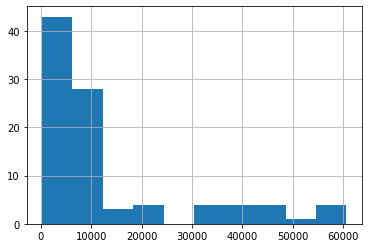

In [ ]:
btc_month_mean['Close_shift'].hist()

In [ ]:
btc_month_mean['Close_shift_diff'] = btc_month_mean['Close_shift'].diff()
btc_month_mean.dropna(inplace=True)

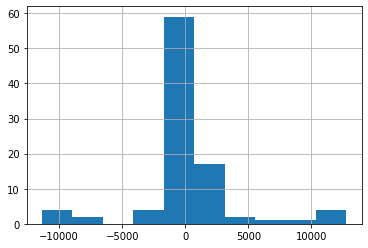

In [ ]:
btc_month_mean['Close_shift_diff'].hist()

Dickey–Fuller test: p=0.092405


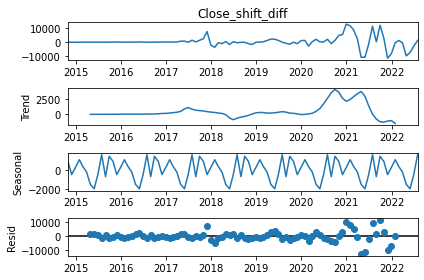

In [ ]:
seasonal_decompose(btc_month_mean['Close_shift_diff']).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(btc_month_mean['Close_shift_diff'])[1])

In [ ]:
btc_month_mean


,Open,High,Low,Close,Volume,Close_shift,Close_shift_diff
Date,,,,,,,
2014-10-31,365.748000,374.314260,354.856645,364.148873,2.912885e+07,366.099799,1.950926
2014-11-30,364.850235,376.494235,357.241831,366.099799,2.199111e+07,341.267871,-24.831928
2014-12-31,343.074836,347.487129,336.565775,341.267871,1.784201e+07,248.782547,-92.485323
2015-01-31,251.799905,261.391583,240.495550,248.782547,3.544555e+07,234.153645,-14.628903
2015-02-28,232.821856,240.211430,227.769678,234.153645,2.541138e+07,269.042259,34.888614
...,...,...,...,...,...,...,...
2022-03-31,41889.148438,42770.031502,41120.731729,41966.237525,2.680464e+10,41435.319661,-530.917864
2022-04-30,41694.653646,42328.085156,40805.150260,41435.319661,2.767053e+10,31706.105217,-9729.214445
2022-05-31,31900.711127,32629.598349,30905.249244,31706.105217,3.566740e+10,24383.685482,-7322.419735


In [ ]:
btc_month_mean['Close_shift_diff_percent'] = None

for i in range(1, len(btc_month_mean)):
  btc_month_mean['Close_shift_diff_percent'][i] = \
  (btc_month_mean['Close_shift'][i] - btc_month_mean['Close_shift'][i-1]) / btc_month_mean['Close_shift'][i-1]

btc_month_mean.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
btc_month_mean

,Open,High,Low,Close,Volume,Close_shift,Close_shift_diff,Close_shift_diff_percent
Date,,,,,,,,
2014-11-30,364.850235,376.494235,357.241831,366.099799,2.199111e+07,341.267871,-24.831928,-0.067828
2014-12-31,343.074836,347.487129,336.565775,341.267871,1.784201e+07,248.782547,-92.485323,-0.271005
2015-01-31,251.799905,261.391583,240.495550,248.782547,3.544555e+07,234.153645,-14.628903,-0.058802
2015-02-28,232.821856,240.211430,227.769678,234.153645,2.541138e+07,269.042259,34.888614,0.148999
2015-03-31,269.278419,274.850999,263.134162,269.042259,3.093865e+07,235.491534,-33.550725,-0.124704
...,...,...,...,...,...,...,...,...
2022-03-31,41889.148438,42770.031502,41120.731729,41966.237525,2.680464e+10,41435.319661,-530.917864,-0.012651
2022-04-30,41694.653646,42328.085156,40805.150260,41435.319661,2.767053e+10,31706.105217,-9729.214445,-0.234805
2022-05-31,31900.711127,32629.598349,30905.249244,31706.105217,3.566740e+10,24383.685482,-7322.419735,-0.230947


Dickey–Fuller test: p=0.000000


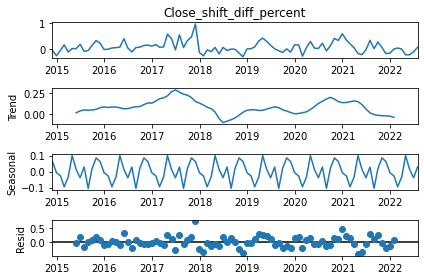

In [114]:
seasonal_decompose(btc_month_mean['Close_shift_diff_percent']).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(btc_month_mean['Close_shift_diff_percent'])[1])

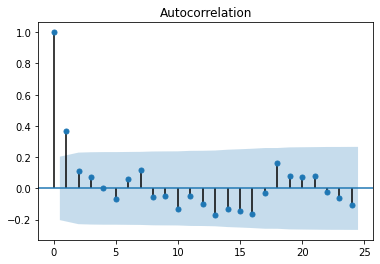

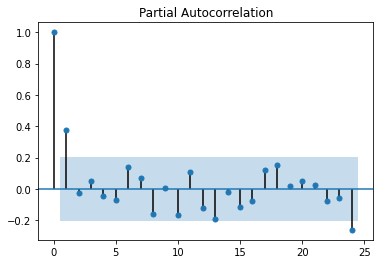

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(btc_month_mean['Close_shift_diff_percent'], lags=24);
plot_pacf(btc_month_mean['Close_shift_diff_percent'], lags=24);

## Train/Test Split + Scale Data

In [ ]:
train_test_split = int(btc_month_mean.shape[0] * 0.75)
train = btc_month_mean.copy().iloc[:train_test_split]
test = btc_month_mean.copy().iloc[train_test_split:]
train.shape, test.shape

((69, 8), (24, 8))

In [ ]:
# scaler = StandardScaler()
scaler = MinMaxScaler()

#hide warnings
train_scaled = pd.DataFrame()
test_scaled = pd.DataFrame()

train_scaled[['Open', 'High', 'Low', 'Volume', 'Close', 'Close_shift_diff_percent']] = \
  scaler.fit_transform(train[['Open', 'High', 'Low', 'Volume', 'Close', 'Close_shift_diff_percent']])
test_scaled[['Open', 'High', 'Low', 'Volume', 'Close', 'Close_shift_diff_percent']] = \
  scaler.transform(test[['Open', 'High', 'Low', 'Volume', 'Close', 'Close_shift_diff_percent']])

train_scaled.index = train.index
test_scaled.index = test.index

display(train_scaled.head())
display(test_scaled.tail())

,Open,High,Low,Volume,Close,Close_shift_diff_percent
Date,,,,,,
2014-11-30,0.008836,0.008840,0.009269,0.000100,0.008798,0.192411
2014-12-31,0.007379,0.007006,0.007789,0.000000,0.007149,0.032382
2015-01-31,0.001270,0.001562,0.000911,0.000423,0.001008,0.199520
2015-02-28,0.000000,0.000223,0.000000,0.000182,0.000037,0.363191
2015-03-31,0.002440,0.002413,0.002532,0.000315,0.002354,0.147613


,Open,High,Low,Volume,Close,Close_shift_diff_percent
Date,,,,,,
2022-03-31,2.787794,2.689440,2.927655,0.643769,2.770967,0.235870
2022-04-30,2.774778,2.661495,2.905062,0.664579,2.735716,0.060894
2022-05-31,2.119331,2.048247,2.196297,0.856768,2.089714,0.063933
2022-06-30,1.643011,1.580276,1.684191,0.739741,1.603520,0.153954
2022-07-31,1.418240,1.376894,1.484209,0.718689,1.414655,0.289413


In [ ]:
X_train = train_scaled.copy().drop(columns=['Close_shift_diff_percent'])
y_train = train_scaled.copy()['Close_shift_diff_percent']

X_test = test_scaled.copy().drop(columns=['Close_shift_diff_percent'])
y_test = test_scaled.copy()['Close_shift_diff_percent']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((69, 5), (69,), (24, 5), (24,))

In [ ]:
X_train

,Open,High,Low,Volume,Close
Date,,,,,
2014-11-30,0.008836,0.008840,0.009269,0.000100,0.008798
2014-12-31,0.007379,0.007006,0.007789,0.000000,0.007149
2015-01-31,0.001270,0.001562,0.000911,0.000423,0.001008
2015-02-28,0.000000,0.000223,0.000000,0.000182,0.000037
2015-03-31,0.002440,0.002413,0.002532,0.000315,0.002354
...,...,...,...,...,...
2020-03-31,0.449104,0.439218,0.457612,1.000000,0.440712
2020-04-30,0.462964,0.449931,0.488099,0.925748,0.464181
2020-05-31,0.602644,0.582645,0.631530,0.996842,0.599545


## LinearRegression fit/predict

In [105]:
lr = LinearRegression()
lr.fit(X_train, y_train) 

lr.score(X_train, y_train) 

0.4117409279168599

In [ ]:
X_test_predict = lr.predict(X_test)
# X_test_predict

X_test_predict_df = pd.DataFrame(X_test_predict, index=X_test.index, columns=['Y_PRED'])
X_test_predict_df

,Y_PRED
Date,
2020-08-31,0.261447
2020-09-30,0.128752
2020-10-31,0.344314
2020-11-30,0.384701
2020-12-31,0.557461
2021-01-31,-0.255088
2021-02-28,0.634938
2021-03-31,0.410557
2021-04-30,-0.296321


## Reassemble data frame with prediction

In [ ]:
predict_df = test.merge(X_test_predict_df, how='left', on='Date')
predict_df

,Open,High,Low,Close,Volume,Close_shift,Close_shift_diff,Close_shift_diff_percent,Y_PRED
Date,,,,,,,,,
2020-08-31,11639.097215,11827.761278,11453.378749,11652.394185,2.285087e+10,10660.276855,-992.117329,-0.085143,0.261447
2020-09-30,10689.700163,10844.910254,10470.011263,10660.276855,3.586498e+10,11886.978201,1226.701345,0.115072,0.128752
2020-10-31,11791.307491,12018.847719,11648.076833,11886.978201,3.389918e+10,16645.757422,4758.779221,0.400335,0.344314
2020-11-30,16450.121647,16945.980208,16064.074740,16645.757422,3.643816e+10,21983.137097,5337.379675,0.320645,0.384701
2020-12-31,21680.540827,22354.685610,21229.362021,21983.137097,3.910515e+10,34761.649950,12778.512853,0.581287,0.557461
2021-01-31,34652.961694,36206.557082,32705.655998,34761.649950,6.946688e+10,46306.798968,11545.149018,0.332123,-0.255088
2021-02-28,45874.967215,47710.414621,44197.377302,46306.798968,8.096975e+10,54998.008695,8691.209727,0.187688,0.634938
2021-03-31,54544.678175,56250.979083,52964.134703,54998.008695,5.423175e+10,57206.720052,2208.711358,0.04016,0.410557
2021-04-30,57251.256250,58557.342057,55604.271094,57206.720052,6.148273e+10,46443.286668,-10763.433384,-0.18815,-0.296321


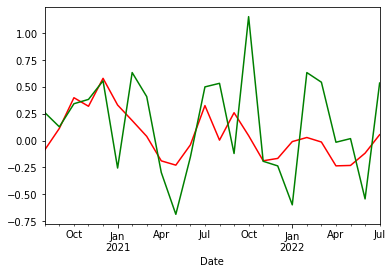

In [104]:
predict_df['Close_shift_diff_percent'].plot(c='red')
predict_df['Y_PRED'].plot(c='green')

In [97]:
predict_df['gain_loss'] = predict_df['Close_shift'] - predict_df['Close']
predict_df

,Open,High,Low,Close,Volume,Close_shift,Close_shift_diff,Close_shift_diff_percent,Y_PRED,gain_loss
Date,,,,,,,,,,
2020-08-31,11639.097215,11827.761278,11453.378749,11652.394185,2.285087e+10,10660.276855,-992.117329,-0.085143,0.261447,-992.117329
2020-09-30,10689.700163,10844.910254,10470.011263,10660.276855,3.586498e+10,11886.978201,1226.701345,0.115072,0.128752,1226.701345
2020-10-31,11791.307491,12018.847719,11648.076833,11886.978201,3.389918e+10,16645.757422,4758.779221,0.400335,0.344314,4758.779221
2020-11-30,16450.121647,16945.980208,16064.074740,16645.757422,3.643816e+10,21983.137097,5337.379675,0.320645,0.384701,5337.379675
2020-12-31,21680.540827,22354.685610,21229.362021,21983.137097,3.910515e+10,34761.649950,12778.512853,0.581287,0.557461,12778.512853
2021-01-31,34652.961694,36206.557082,32705.655998,34761.649950,6.946688e+10,46306.798968,11545.149018,0.332123,-0.255088,11545.149018
2021-02-28,45874.967215,47710.414621,44197.377302,46306.798968,8.096975e+10,54998.008695,8691.209727,0.187688,0.634938,8691.209727
2021-03-31,54544.678175,56250.979083,52964.134703,54998.008695,5.423175e+10,57206.720052,2208.711358,0.04016,0.410557,2208.711358
2021-04-30,57251.256250,58557.342057,55604.271094,57206.720052,6.148273e+10,46443.286668,-10763.433384,-0.18815,-0.296321,-10763.433384


## Evaluate strategy

### if Y_PRED > 0

In [99]:
gain_loss = []
for index, row in predict_df.iterrows():
  if row['Y_PRED'] > 0:
    print(f'{index}::{row["Y_PRED"]}')

    gain_loss.append(row['Close_shift'] - row['Close'])
    
display(gain_loss)
print(f'GAIN/LOSS: {sum(gain_loss)}')

2020-08-31 00:00:00::0.26144741193374854
2020-09-30 00:00:00::0.1287521995512778
2020-10-31 00:00:00::0.34431405546880767
2020-11-30 00:00:00::0.3847010338762603
2020-12-31 00:00:00::0.5574607331317006
2021-02-28 00:00:00::0.6349377202530656
2021-03-31 00:00:00::0.41055668207350726
2021-07-31 00:00:00::0.5012799688973312
2021-08-31 00:00:00::0.5344978998265356
2021-10-31 00:00:00::1.156007221437735
2022-02-28 00:00:00::0.6347219210206371
2022-03-31 00:00:00::0.5448536796704412
2022-05-31 00:00:00::0.019161448935245518
2022-07-31 00:00:00::0.5370193779437559


[-992.117329259072,
 1226.701345136089,
 4758.779221270162,
 5337.379674899192,
 12778.51285282258,
 8691.209726922527,
 2208.7113575268813,
 11264.04889112903,
 230.7488029233864,
 2709.51828797043,
 1202.763473862331,
 -530.9178637432778,
 -7322.419734963038,
 1191.747965203107]

GAIN/LOSS: 42754.666671700325


### if Y_PRED > .1


In [101]:
gain_loss = []
for index, row in predict_df.iterrows():
  if row['Y_PRED'] > .1:
    print(f'{index}::{row["Y_PRED"]}')

    gain_loss.append(row['Close_shift'] - row['Close'])
    
display(gain_loss)
print(f'GAIN/LOSS: {sum(gain_loss)}')

2020-08-31 00:00:00::0.26144741193374854
2020-09-30 00:00:00::0.1287521995512778
2020-10-31 00:00:00::0.34431405546880767
2020-11-30 00:00:00::0.3847010338762603
2020-12-31 00:00:00::0.5574607331317006
2021-02-28 00:00:00::0.6349377202530656
2021-03-31 00:00:00::0.41055668207350726
2021-07-31 00:00:00::0.5012799688973312
2021-08-31 00:00:00::0.5344978998265356
2021-10-31 00:00:00::1.156007221437735
2022-02-28 00:00:00::0.6347219210206371
2022-03-31 00:00:00::0.5448536796704412
2022-07-31 00:00:00::0.5370193779437559


[-992.117329259072,
 1226.701345136089,
 4758.779221270162,
 5337.379674899192,
 12778.51285282258,
 8691.209726922527,
 2208.7113575268813,
 11264.04889112903,
 230.7488029233864,
 2709.51828797043,
 1202.763473862331,
 -530.9178637432778,
 1191.747965203107]

GAIN/LOSS: 50077.086406663366


### if Y_PRED > .20

In [102]:
gain_loss = []
for index, row in predict_df.iterrows():
  if row['Y_PRED'] > .2:
    print(f'{index}::{row["Y_PRED"]}')

    gain_loss.append(row['Close_shift'] - row['Close'])
    
display(gain_loss)
print(f'GAIN/LOSS: {sum(gain_loss)}')

2020-08-31 00:00:00::0.26144741193374854
2020-10-31 00:00:00::0.34431405546880767
2020-11-30 00:00:00::0.3847010338762603
2020-12-31 00:00:00::0.5574607331317006
2021-02-28 00:00:00::0.6349377202530656
2021-03-31 00:00:00::0.41055668207350726
2021-07-31 00:00:00::0.5012799688973312
2021-08-31 00:00:00::0.5344978998265356
2021-10-31 00:00:00::1.156007221437735
2022-02-28 00:00:00::0.6347219210206371
2022-03-31 00:00:00::0.5448536796704412
2022-07-31 00:00:00::0.5370193779437559


[-992.117329259072,
 4758.779221270162,
 5337.379674899192,
 12778.51285282258,
 8691.209726922527,
 2208.7113575268813,
 11264.04889112903,
 230.7488029233864,
 2709.51828797043,
 1202.763473862331,
 -530.9178637432778,
 1191.747965203107]

GAIN/LOSS: 48850.38506152728


In [106]:
predict_df.shape

(24, 10)

In [109]:
#find residuals and P values
from statsmodels.api import OLS

ols = OLS(y_train, X_train).fit()

In [110]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Close_shift_diff_percent   R-squared (uncentered):                   0.504
Model:                                  OLS   Adj. R-squared (uncentered):              0.465
Method:                       Least Squares   F-statistic:                              13.00
Date:                      Sat, 27 Aug 2022   Prob (F-statistic):                    9.74e-09
Time:                              13:59:32   Log-Likelihood:                        -0.53782
No. Observations:                        69   AIC:                                      11.08
Df Residuals:                            64   BIC:                                      22.25
Df Model:                                 5                                                  
Covariance Type:                  nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Open         -84.8369     18.871     -4.496      0.000    -122.537     -47.137
High          80.7722     27.245      2.965      0.004      26.343     135.201
Low           61.6918     18.260      3.379      0.001      25.213      98.170
Volume        -0.2367      0.174     -1.360      0.179      -0.584       0.111
Close        -57.2867     31.324     -1.829      0.072    -119.863       5.289
==============================================================================
Omnibus:                        0.750   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.687   Jarque-Bera (JB):                0.814
Skew:                          -0.102   Prob(JB):                        0.666
Kurtosis:                       2.509   Cond. No.                     1.25e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

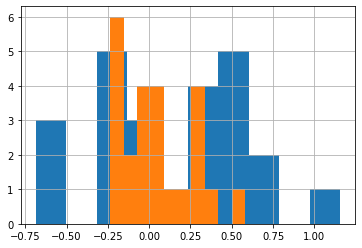

In [112]:
predict_df['Y_PRED'].hist()
predict_df['Close_shift_diff_percent'].hist()


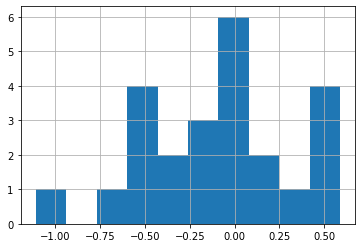

In [113]:
(predict_df['Close_shift_diff_percent']-predict_df['Y_PRED']).hist()

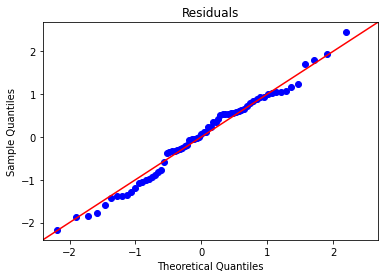

In [122]:
sm.qqplot(ols.resid, fit=True, line='45')
plt.title('Residuals')
plt.show()


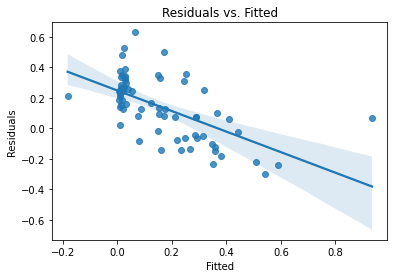

In [125]:
    sns.regplot(x=ols.fittedvalues, y=ols.resid)
    plt.xlabel('Fitted')
    plt.ylabel('Residuals')
    plt.title('Residuals vs. Fitted')
    plt.show()